In [ ]:
pip install pySCATMECH
pip install numpy
pip install matplotlib

In [1]:
from pySCATMECH.mueller import *
import random
import matplotlib.pyplot as plt

In [7]:
m1 = MuellerMatrix([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
m2 = MuellerMatrix([1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1])
m3 = MuellerMatrix(1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1)
m4 = JonesMueller([[1,0],[0,1]])
m5 = MuellerUnit()
print(m5)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [9]:
m1 = MuellerMatrix([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
m2 = MuellerMatrix([1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1])
m3 = MuellerMatrix(1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1)
m4 = JonesMueller([[1,0],[0,1]])
m5 = MuellerUnit()
print(m5)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [12]:
print(m5.valid())
print(m1.physically_valid())

True
True


In [67]:
# Returns a random number with a normal distribution...
ran = lambda : random.gauss(0,1)

# Create 20 random matrices...
m1 = [MuellerMatrix([[ran(), ran(), ran(), ran()],
                    [ran(), ran(), ran(), ran()],
                    [ran(), ran(), ran(), ran()],
                    [ran(), ran(), ran(), ran()]]) for i in range(20)]

# See if they are valid...
print("Number value() is True:", sum([m.valid() for m in m1]))
print("Number physically valid() is True:", sum([m.physically_valid() for m in m1]))

Number value() is True: 2
Number physically valid() is True: 0


In [77]:
# Returns a random complex number with a normal distribution...
ranc = lambda : random.gauss(0,1)+random.gauss(0,1)*1j

# Create 20 random Jones-Mueller matrices...
m1 = [JonesMueller([[ranc(), ranc()], [ranc(), ranc()]]) for i in range(20)]

# See if they are valid...
print("Number value() is True:", sum([m.valid() for m in m1]))
print("Number physically valid() is True:", sum([m.physically_valid() for m in m1]))

Number value() is True: 20
Number physically valid() is True: 20


In [84]:
def RandomMuellerMatrix(n):
    """
    Creates a random Mueller matrix by averaging `n` Jones-Mueller matrices.
    """
    ranc = lambda : (random.gauss(0,1)+random.gauss(0,1)*1j)/2
    return sum([JonesMueller([[ranc(),ranc()],[ranc(),ranc()]]) for i in range(n)])/n

m = RandomMuellerMatrix(4)
print(m)
print("m is a valid Stokes to Stokes mapper:",m.valid())
print("m is the sum of Jones-Mueller matrices:",m.physically_valid())


[[ 1.30753019 -0.13271063 -0.12036948  0.117276  ]
 [-0.04774596 -0.09655577  0.34782284 -0.27056385]
 [ 0.16704253  0.03457475 -0.05735983 -0.53032993]
 [ 0.34921294  0.18061889 -0.0708707   0.15603395]]
m is a valid Stokes to Stokes mapper: True
m is the sum of Jones-Mueller matrices: True


In [14]:
print("Unpolarized Stokes vector:", StokesVector((1,0,0,0)) )

print("Unpolarized Stokes vector:", StokesVector(1,0,0,0) )

print("s-polarized unit polarization from a Jones vector:", JonesStokes((1.,0.)) )

print("p-polarized unit Stokes vector:", Polarization('p') )

print("s-polarized unit Stokes vector:", Polarization(state = 's') )

print("Left-handed circularly polarized unit Stokes vector:", Polarization("L") )

print("Right-handed circularly polarized unit Stokes vector with intensity 2:", Polarization("R", I=2) )

print("Unpolarized Stokes vector:", Polarization("U") )

print("Unpolarized Stokes vector:", Polarization('s', DOP=0) )

print("Linear polarization at 45 degrees:", Polarization(angle = 45*deg) )

print("Elliptically polarized radiation:", Polarization(angle = 34*deg, ellipticity = 20*deg) )

print("Partially polarized radiation:", Polarization("S", DOP = 0.8) )

print("Partially polarized elliptical polarized radiation with intensity 3:\n",
      Polarization(angle = 34*deg, ellipticity = 20*deg, DOP = 0.7, I = 3) )

Unpolarized Stokes vector: StokesVector(1,0,0,0)
Unpolarized Stokes vector: StokesVector(1,0,0,0)
s-polarized unit polarization from a Jones vector: StokesVector(1.0,1.0,0.0,0.0)
p-polarized unit Stokes vector: StokesVector(1,-1,0,0)
s-polarized unit Stokes vector: StokesVector(1,1,0,0)
Left-handed circularly polarized unit Stokes vector: StokesVector(1,0,0,1)
Right-handed circularly polarized unit Stokes vector with intensity 2: StokesVector(2,0,0,-2)
Unpolarized Stokes vector: StokesVector(1,0,0,0)
Unpolarized Stokes vector: StokesVector(1,0,0,0)
Linear polarization at 45 degrees: StokesVector(1.0,6.123233995736766e-17,1.0,0.0)
Elliptically polarized radiation: StokesVector(1.0,0.2869652992419897,0.7102640395405222,0.6427876096865393)
Partially polarized radiation: StokesVector(1.0,0.8,0.0,0.0)
Partially polarized elliptical polarized radiation with intensity 3:
 StokesVector(3.0,0.6026271284081782,1.4915544830350964,1.3498539803417322)


In [15]:
# Only sensitive to p-polarization
# The following two statements are equivalent...
sens = Polarization('p', sensitivity = True)
sens = Sensitivity('p')

print('Signal for p-polarization:',sens @ Polarization('p'))
print('Signal for s-polarization:',sens @ Polarization('s'))


Signal for p-polarization: 1.0
Signal for s-polarization: 0.0


In [16]:
sens = Sensitivity('p',DOP=.8)
print('sens = ', sens)

print('Signal for p-polarization:',sens @ Polarization('p'))
print('Signal for s-polarization:',sens @ Polarization('s'))

sens =  StokesVector(0.6,-0.4,0.0,0.0)
Signal for p-polarization: 1.0
Signal for s-polarization: 0.19999999999999996


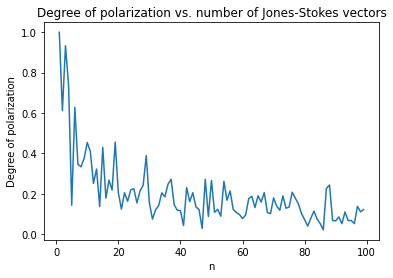

In [17]:
def RandomStokesVector(n):
    ranc = lambda : (random.gauss(0,1) + random.gauss(0,1)*1j)/2
    return sum([JonesStokes([ranc(),ranc()]) for i in range(n)])/n

plt.figure()
plt.plot(range(1,100),[RandomStokesVector(i).DOP() for i in range(1,100)])
plt.title("Degree of polarization vs. number of Jones-Stokes vectors")
plt.xlabel("n")
plt.ylabel("Degree of polarization")
plt.show()

In [18]:
m1 = RandomMuellerMatrix(4)
m2 = RandomMuellerMatrix(4)
s1 = RandomStokesVector(4)
s2 = RandomStokesVector(4)
print("m1 = \n",m1)
print("m2 = \n",m2)
print("s1 = ",s1)
print("s2 = ",s2)
print("m1 * s1 = ",m1 * s1)
print("m1 @ s1 = ",m1 * s1)
print("m1.dot(s1) = ",m1.dot(s1))
print("m1 @ m2 = ",m1 * m2)
print("s1 @ m1 = ",s1 * m1)
print("s1 @ s2 = ",s1 * s2)

m1 = 
 [[ 1.20325893 -0.64387098  0.31722447 -0.1288818 ]
 [ 0.06133158 -0.11009368  0.43599539  0.18709852]
 [-0.07873886  0.13246198 -0.31795541 -0.19315755]
 [ 0.56099399 -0.27983093  0.22240606  0.03232728]]
m2 = 
 [[ 0.81725896  0.18663155  0.05378429  0.1537891 ]
 [-0.03529391  0.2739689  -0.11325164  0.18524945]
 [-0.37955501 -0.13181827  0.20066062 -0.00646108]
 [ 0.11711649  0.06994022  0.02796998  0.20343243]]
s1 =  StokesVector(0.790870847724691,0.5871887584344051,-0.10949674503913882,0.09599073210037935)
s2 =  StokesVector(1.1084465125606044,-0.41241563857529173,-0.6883353167559227,0.548099504781427)
m1 * s1 =  StokesVector(0.526442103001284,-0.045920766491242264,0.03178166936234205,0.25811059941877024)
m1 @ s1 =  StokesVector(0.526442103001284,-0.045920766491242264,0.03178166936234205,0.25811059941877024)
m1.dot(s1) =  [ 0.5264421  -0.04592077  0.03178167  0.2581106 ]
m1 @ m2 =  [[ 0.87060054 -0.00266455  0.1976855   0.03750301]
 [-0.08956249 -0.06310228  0.10848721  0.024

In [19]:
M = RandomMuellerMatrix(4)
MCD = M.Cloude_Decomposition()
print("M = \n\n",M,"\n\nCloude decomposition =\n")
for m in MCD:
    print(m,"\n")

M = 

 [[ 1.02678228 -0.0810529  -0.01791286 -0.09556172]
 [ 0.06571187 -0.21722769 -0.43160788  0.12523781]
 [-0.15432166 -0.28909379 -0.00723991  0.00905307]
 [ 0.1324646   0.2453329   0.06786545 -0.2523414 ]] 

Cloude decomposition =

[[ 0.52591     0.07403252 -0.07435076 -0.10905932]
 [ 0.05000843 -0.1174819  -0.49210226  0.01458624]
 [-0.04813269 -0.46662365  0.11152784 -0.16068358]
 [ 0.13448118  0.16619186 -0.06784901 -0.48942876]] 

[[ 0.31045926 -0.14334207  0.07695803 -0.04185171]
 [ 0.07236541 -0.21619094 -0.02281796  0.16168324]
 [-0.15041428  0.17936608 -0.19375803  0.14516883]
 [-0.01896961  0.09899564  0.18979885  0.15066521]] 

[[ 0.13542859 -0.0494784  -0.02468664  0.06150676]
 [-0.06501234  0.1108986   0.0468375  -0.03513734]
 [ 0.02113412 -0.03174302  0.08810613  0.05636151]
 [ 0.046555    0.0253431  -0.0464033   0.1042694 ]] 

[[ 0.05498442  0.03773505  0.00416651 -0.00615745]
 [ 0.00835038  0.00554655  0.03647483 -0.01589433]
 [ 0.02309118  0.0299068  -0.01311586 -

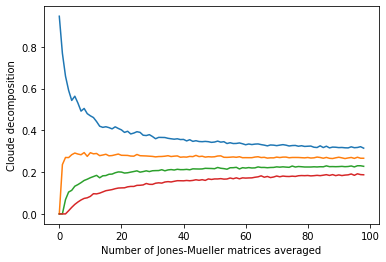

In [21]:
jmax = 100
imax = 100
mCD00sums = []
for i in range(1,imax):
    mCD00sum = np.array([0,0,0,0])
    for j in range(jmax):
        M = RandomMuellerMatrix(i)
        mCD = Cloude_Decomposition(M)
        mCD00sum = mCD00sum + np.array([m[0,0] for m in mCD])
    mCD00sums.append(mCD00sum/jmax)
plt.figure()
plt.plot(mCD00sums)
plt.xlabel("Number of Jones-Mueller matrices averaged")
plt.ylabel("Cloude decomposition")
plt.show()


In [22]:

def printMatrix(name,M):
    print("\n",name,"=\n")
    print(M)

M = RandomMuellerMatrix(4)
depol, ret, diatten = Lu_Chipman_Decomposition(M)
printMatrix("M",M)
printMatrix("Depolarizer",depol)
printMatrix("Retarder",ret)
printMatrix("Diattenuator",diatten)
printMatrix("The product Depolarizer . Retarder .  Diattenuator",depol @ ret @ diatten)


 M =

[[ 0.8939604  -0.03616874  0.32331696  0.07715862]
 [-0.11503428 -0.07667013  0.08526914  0.34244714]
 [ 0.12209799 -0.0498061  -0.00958732  0.31956155]
 [-0.0076232   0.15220438 -0.04175769  0.00843327]]

 Depolarizer =

[[ 1.          0.          0.          0.        ]
 [-0.2321907   0.42284456  0.20940216 -0.04184302]
 [ 0.12481226  0.20940216  0.31972253  0.01123965]
 [ 0.01678932 -0.04184302  0.01123965  0.18618016]]

 Retarder =

[[ 1.00000000e+00 -5.23127548e-18 -1.19262239e-17  1.38777878e-17]
 [-2.39391840e-16 -5.68041497e-02  7.34713821e-01  6.75994741e-01]
 [ 4.40619763e-16 -1.67427817e-01 -6.74509486e-01  7.19030514e-01]
 [-1.38777878e-17  9.84246521e-01 -7.23364071e-02  1.61326469e-01]]

 Diattenuator =

[[ 0.8939604  -0.03616874  0.32331696  0.07715862]
 [-0.03616874  0.82983686 -0.00678683 -0.00161966]
 [ 0.32331696 -0.00678683  0.88974597  0.01447832]
 [ 0.07715862 -0.00161966  0.01447832  0.83253284]]

 The product Depolarizer . Retarder .  Diattenuator =

[[ 0

In [23]:
M = RandomMuellerMatrix(2)
diatten2, ret2, depol, ret1, diatten1 = Symmetric_Decomposition(M)
printMatrix("M",M)
printMatrix("diatten2",diatten2)
printMatrix("ret2",ret2)
printMatrix("depol",depol)
printMatrix("ret1",ret1)
printMatrix("diatten1",diatten1)
printMatrix("The product Diattenuator2 . Retarder2 .  Depolarizer . Retarder1 . Diattenuator1",
            diatten2 @ ret2 @ depol @ ret1 @ diatten1)



 M =

[[ 1.57587987  0.36926405 -0.17498708 -0.13088422]
 [-0.34703776 -1.3395769   0.1061999  -0.08874263]
 [ 0.14112965 -0.47208194  0.17376427 -0.23947818]
 [ 0.41627319  0.45273489 -0.25580516 -0.12794188]]

 diatten2 =

[[ 1.         -0.12365251  0.13109661  0.22067771]
 [-0.12365251  0.96636039 -0.00827673 -0.0139324 ]
 [ 0.13109661 -0.00827673  0.96732865  0.01477115]
 [ 0.22067771 -0.0139324   0.01477115  0.98341824]]

 ret2 =

[[ 1.          0.          0.          0.        ]
 [ 0.         -0.88643177 -0.09113382  0.45379879]
 [ 0.         -0.37322365 -0.43913665 -0.81722892]
 [ 0.          0.27375687 -0.89378612  0.35525138]]

 depol =

[[1.54828592 0.         0.         0.        ]
 [0.         1.54828592 0.         0.        ]
 [0.         0.         0.23793791 0.        ]
 [0.         0.         0.         0.23793791]]

 ret1 =

[[ 1.          0.          0.          0.        ]
 [ 0.          0.98505431 -0.13769613  0.10347843]
 [ 0.         -0.02920303  0.45855646  0.8

In [24]:

M = RandomMuellerMatrix(2)
diatten2, ret2, depol, ret1, diatten1 = Symmetric_Decomposition(M)
printMatrix("M",M)
printMatrix("diatten2",diatten2)
printMatrix("ret2",ret2)
printMatrix("depol",depol)
printMatrix("ret1",ret1)
printMatrix("diatten1",diatten1)
printMatrix("The product Diattenuator2 . Retarder2 .  Depolarizer . Retarder1 . Diattenuator1",
            diatten2 @ ret2 @ depol @ ret1 @ diatten1)



 M =

[[ 1.05665963  0.28829731 -0.45326917  0.32433335]
 [-0.46762175  0.24263705  0.26490952 -0.27580518]
 [ 0.48547741  0.24451012 -0.70281168  0.12577189]
 [ 0.04848126  0.00231708 -0.01205412 -0.44240785]]

 diatten2 =

[[ 1.         -0.75629777  0.25629099  0.3726163 ]
 [-0.75629777  0.86112444 -0.13161314 -0.1913497 ]
 [ 0.25629099 -0.13161314  0.51734325  0.06484378]
 [ 0.3726163  -0.1913497   0.06484378  0.56701781]]

 ret2 =

[[ 1.          0.          0.          0.        ]
 [ 0.         -0.06630864  0.526365    0.84766919]
 [ 0.          0.94686582  0.30115006 -0.11293258]
 [ 0.         -0.31471939  0.79514057 -0.51836588]]

 depol =

[[2.50803489 0.         0.         0.        ]
 [0.         2.50803489 0.         0.        ]
 [0.         0.         2.1029468  0.        ]
 [0.         0.         0.         2.10294679]]

 ret1 =

[[ 1.          0.          0.          0.        ]
 [ 0.         -0.03839845 -0.98113085  0.18949358]
 [ 0.          0.46315278 -0.18550868 -0.8

In [25]:
M = RandomMuellerMatrix(4)
L = MuellerLog(M)
printMatrix("M",M)
printMatrix("L",L)
printMatrix("MuellerExp(L)",MuellerExp(L))


 M =

[[ 1.16264301  0.04715024 -0.10252933  0.45746921]
 [-0.252436    0.00980227  0.34624876 -0.25670903]
 [ 0.31351884  0.03792399  0.18064961  0.40214503]
 [ 0.05018443  0.81618024  0.31839437  0.27213187]]

 L =

[[ 0.03305322 -0.52294497  0.01989376  0.50527657]
 [-0.4539746  -0.68154641  1.16839875 -0.90962312]
 [ 0.28233564 -0.90910643 -1.14135879  0.64408036]
 [ 0.46769686  2.09086625 -0.4704783  -0.40147538]]

 MuellerExp(L) =

[[ 1.16264301  0.04715024 -0.10252933  0.45746921]
 [-0.252436    0.00980227  0.34624876 -0.25670903]
 [ 0.31351884  0.03792399  0.18064961  0.40214503]
 [ 0.05018443  0.81618024  0.31839437  0.27213187]]


In [26]:
M = RandomMuellerMatrix(4)

print("Tmax = ",M.Tmax())
print("Tmin = ",M.Tmin())
print("diattenuation = ",M.diattenuation())
print("linear diattenuation = ",M.linear_diattenuation())
print("polarization dependent loss = ",M.polarization_dependent_loss())
print("polarizance = ",M.polarizance())
print("depolarization index = ",M.depolarization_index())
print("extinction_ratio = ",M.extinction_ratio())

Tmax =  1.1356755399073202
Tmin =  0.3204175232900304
diattenuation =  0.5598941696948352
linear diattenuation =  0.539897343082095
polarization dependent loss =  5.495380129234592
polarizance =  0.5298013123360192
depolarization index =  0.5963903600884352
extinction_ratio =  3.544361520076252


In [27]:
parametersM = CharacterizedMueller(M)
print(parametersM)

Mdepol = 
[[ 1.          0.          0.          0.        ]
 [-0.31698435  0.30596498 -0.09512423  0.08970502]
 [-0.29884491 -0.09512423  0.54018029 -0.04540533]
 [ 0.2718872   0.08970502 -0.04540533  0.34630371]]
Mret = 
[[ 1.00000000e+00  1.21430643e-17  3.20923843e-17  0.00000000e+00]
 [-2.77555756e-16  3.61216645e-01 -8.98120191e-01 -2.50804023e-01]
 [-1.07552856e-16  2.47032730e-01  3.51521095e-01 -9.02999308e-01]
 [ 2.22044605e-16  8.99164816e-01  2.64221578e-01  3.48840354e-01]]
Mdiatten = 
[[ 0.72804653 -0.29325103  0.26174064 -0.10796795]
 [-0.29325103  0.66782986 -0.05765558  0.02378291]
 [ 0.26174064 -0.05765558  0.65469362 -0.02122739]
 [-0.10796795  0.02378291 -0.02122739  0.61198954]]
DiattenuationVector = [-0.29325103  0.26174064 -0.10796795]
Diattenuation = 0.40762900830864485
CircularDiattenuation = -0.10796795104431597
LinearDiattenuation = 0.39307038805025935
DiattenuationAngle = 1.2064549706984762 rad (69.12477799360208 deg)
PolarizanceVector = [-0.31698435 -0.2988

In [90]:
cd E:\Polarimeter\Polarimeter\Expdata\PLI\Ferret\20210628_1503_05xM_corpus_callosum_3mm\analyzed_632_MES
    //works
import os
CURR_DIR = os.getcwd()
print(CURR_DIR)

E:\Polarimeter\Polarimeter\Expdata\PLI\Ferret\20210628_1503_05xM_corpus_callosum_3mm\analyzed_632_MES


In [104]:
m11 = open("m11.txt")
m12 = open("m12.txt")
m13 = open("m13.txt")
m14 = open("m14.txt")
m21 = open("m21.txt")
m22 = open("m22.txt")
m23 = open("m23.txt")
m24 = open("m24.txt")
m31 = open("m31.txt")
m32 = open("m32.txt")
m33 = open("m33.txt")
m34 = open("m34.txt")
m41 = open("m41.txt")
m42 = open("m42.txt")
m43 = open("m43.txt")
m44 = open("m44.txt")
m1 = m11.read()
m2 = m12.read()
m3 = m13.read()
m4 = m14.read()
m5 = m21.read()
m6 = m22.read()
m7 = m23.read()
m8 = m24.read()
m9 = m31.read()
m10 = m32.read()
m011 = m33.read()
m012 = m34.read()
m013 = m41.read()
m014 = m42.read()
m015 = m43.read()
m016 = m44.read()

MM = np.array([[m1, m2, m3, m4], [m5, m6, m7, m8], [m9, m10, m011, m012], [m013, m014, m015, m016]])

Mule = MuellerUnit(MM)

print(Mule)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 3 dimensions. The detected shape was (1, 4, 4) + inhomogeneous part.

In [111]:
img = plt.imread('mat2tiff_muellerRaw_125scale.tif', '.tif')

img.shape

img.show()

AttributeError: 'numpy.ndarray' object has no attribute 'show'